In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('heart_disease_uci.csv')

***Model Training***


In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [13]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
numeric_columns=df.select_dtypes(include='number').columns
df[numeric_columns]=df[numeric_columns].fillna(df[numeric_columns].mean())

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

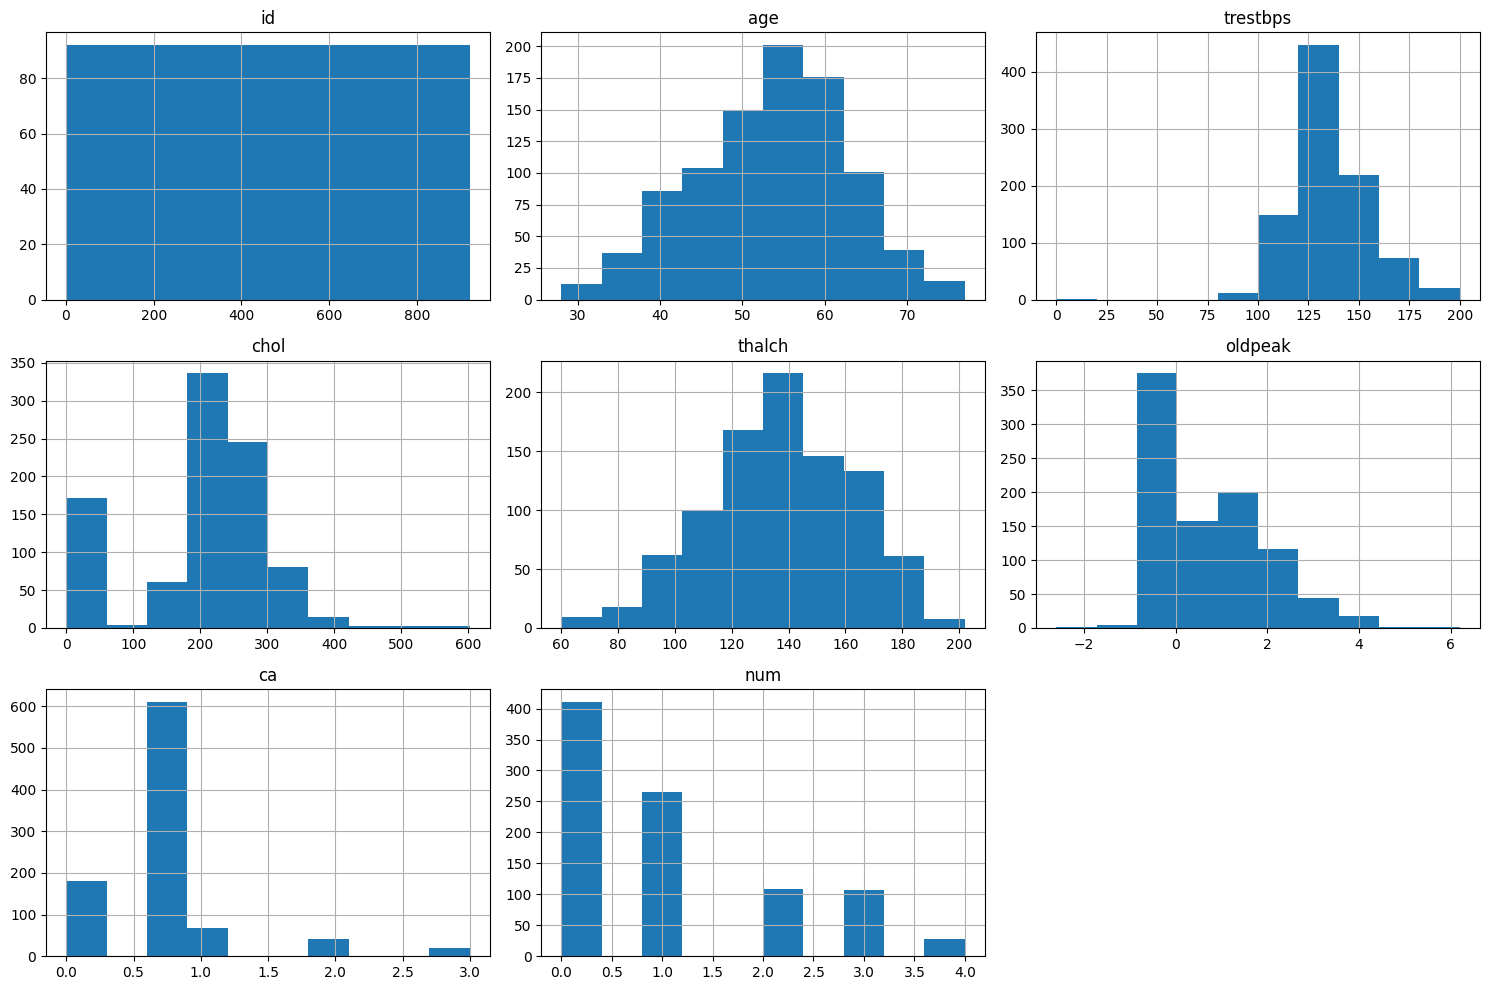

In [9]:
df[numeric_columns].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

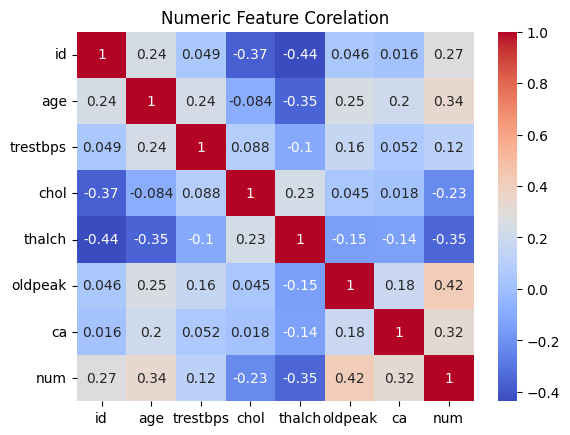

In [10]:
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='coolwarm')
plt.title("Numeric Feature Corelation")
plt.show()

In [11]:
cat_columns=df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_columns:
  cat_columns.remove('num')          #Don't encode target column

In [12]:
x=df.drop('num',axis=1)
y=(df['num']>0).astype(int)

In [13]:
X=pd.get_dummies(x,columns=cat_columns)
print("Final feature Columns",X.columns)

Final feature Columns Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


***Train/Test Split,Normalization,Modelling Model Evaluation***


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

new value=(x_mean)/ Standard deviation

In [16]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr_model=LogisticRegression()#Giving admission to a new student
lr_model.fit(X_train_scaled,y_train)#training step

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


***Model Evaluation***

In [19]:
from sklearn.metrics import accuracy_score,classification_report

In [20]:
Y_pred_lr=lr_model.predict(X_test_scaled)
print("logistic Regression Accuracy",accuracy_score(y_test,Y_pred_lr))
print(classification_report(y_test,Y_pred_lr))

logistic Regression Accuracy 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Random Forest and Feature importance


In [21]:
from sklearn.metrics import confusion_matrix

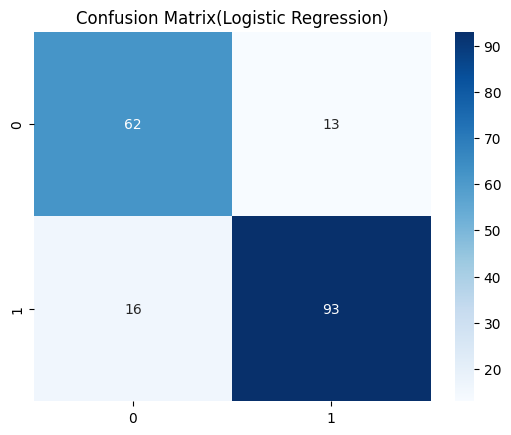

In [22]:
cm=confusion_matrix(y_test,Y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix(Logistic Regression)")
plt.show()

Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train_scaled,y_train)
y_pred_rf=rf_model.predict(X_test_scaled)
print("Random Forest Accuracy",accuracy_score(y_test,y_pred_rf))

Random Forest Accuracy 0.8858695652173914


Feature Importance


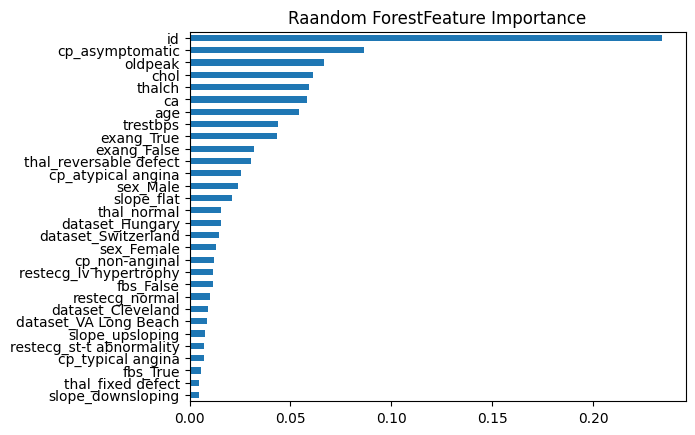

In [27]:
feat_imp=pd.Series(rf_model.feature_importances_,index=X.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh')
plt.title("Raandom ForestFeature Importance")
plt.show()

Save Model


In [28]:
import joblib
joblib.dump(rf_model,'heart_disease_model.pkl')
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']